In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
orders_df = pd.read_excel('Dataset.xlsx', sheet_name='Orders')
orders_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135


In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [8]:
orders_df['Order ID'].duplicated().any()

True

In [9]:
returned_df = pd.read_excel('Dataset.xlsx', sheet_name='Return')
returned_df

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [10]:
returned_df.duplicated().any()

False

In [11]:
order_return_df = orders_df.merge(returned_df, on='Order ID', how='left', indicator=True)
order_no_return = order_return_df[(order_return_df._merge=='left_only')].drop(['_merge', 'Returned'], axis=1)
order_no_return

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135


In [12]:
group_order_df = order_no_return.groupby([ 'Order ID', 'Customer ID', 'Order Date', 'Channel', 'Postal Code'], as_index=False) \
                .agg(total_sales=('Sales', 'sum'), total_quantities=('Quantity', 'sum'), total_cost=('Unit Cost', 'sum'))
group_order_df

,Order ID,Customer ID,Order Date,Channel,Postal Code,total_sales,total_quantities,total_cost
0,CA-2014-100006,DK-13375,2014-09-07,Consumer,10024,377.970,3,89.4529
1,CA-2014-100090,EB-13705,2014-07-08,Corporate,94122,699.192,9,218.1174
2,CA-2014-100293,NF-18475,2014-03-14,Home Office,32216,91.056,6,9.8644
3,CA-2014-100328,JC-15340,2014-01-28,Consumer,10024,3.928,1,2.6023
4,CA-2014-100363,JM-15655,2014-04-08,Corporate,85301,21.376,5,4.8088
...,...,...,...,...,...,...,...,...
4708,US-2017-168802,JO-15145,2017-11-03,Corporate,98103,18.368,4,3.0996
4709,US-2017-169320,LH-16900,2017-07-23,Consumer,46514,171.430,7,32.8087
4710,US-2017-169488,AA-10375,2017-09-07,Consumer,2908,56.860,7,12.4146
4711,US-2017-169502,MG-17650,2017-08-28,Home Office,53209,113.410,8,18.3143


In [16]:
# Identify value 'R' - recency
recency_order = group_order_df.groupby('Customer ID', as_index=False).agg({'Order Date':'max'})
recency_order['recency'] = (pd.to_datetime('2017-12-31') - recency_order['Order Date'])/ np.timedelta64(1, 'D')
recency_order['R_score'] = pd.qcut(recency_order['recency'], 5, labels=np.arange(5, 0, -1))
recency_order.sort_values('recency')

,Customer ID,Order Date,recency,R_score
391,JM-15580,2017-12-30,1.0,5
132,CC-12430,2017-12-30,1.0,5
602,PO-18865,2017-12-30,1.0,5
417,KB-16600,2017-12-29,2.0,5
364,JG-15160,2017-12-29,2.0,5
...,...,...,...,...
636,RE-19405,2014-12-29,1098.0,1
309,GR-14560,2014-11-21,1136.0,1
551,NB-18580,2014-10-22,1166.0,1
167,CR-12625,2014-08-23,1226.0,1


In [17]:
frequency_order = group_order_df.groupby('Customer ID', as_index=False).agg(Frequency=('Order ID', 'count'))
frequency_order['F_score'] = pd.qcut(frequency_order['Frequency'], 5, labels=np.arange(1, 6, 1))
frequency_order.sort_values('Frequency', ascending=False)

,Customer ID,Frequency,F_score
275,EP-13915,17,5
147,CK-12205,13,5
700,SM-20950,12,5
423,KD-16495,12,5
355,JE-15745,12,5
...,...,...,...
546,MW-18235,1,1
301,GH-14665,1,1
344,JC-15385,1,1
49,AR-10570,1,1


In [18]:
money_order = group_order_df.groupby('Customer ID', as_index=False).agg(Monetary=('total_sales', 'sum'))
money_order['M_score'] = pd.qcut(money_order['Monetary'], 5, labels=np.arange(1, 6, 1))
money_order.sort_values('Monetary', ascending=False)

,Customer ID,Monetary,M_score
698,SM-20320,24516.600,5
739,TC-20980,18951.820,5
728,TA-21385,14595.620,5
433,KL-16645,14175.229,5
6,AB-10105,13881.263,5
...,...,...,...
657,RS-19870,22.328,1
507,MG-18205,16.739,1
145,CJ-11875,16.520,1
455,LD-16855,5.304,1


In [19]:
rfm_df = pd.merge(pd.merge(recency_order, frequency_order, on='Customer ID'), money_order, on='Customer ID')
rfm_df['RFM'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)
rfm_df.sort_values('RFM', ascending=False)

,Customer ID,Order Date,recency,R_score,Frequency,F_score,Monetary,M_score,RFM
65,BB-11545,2017-12-02,29.0,5,9,5,6765.7280,5,555
785,WB-21850,2017-12-10,21.0,5,10,5,4222.1780,5,555
314,GZ-14470,2017-12-23,8.0,5,9,5,4355.1500,5,555
31,AH-10210,2017-12-24,7.0,5,9,5,4805.3440,5,555
327,HM-14860,2017-12-28,3.0,5,10,5,8236.7648,5,555
...,...,...,...,...,...,...,...,...,...
758,TS-21085,2017-01-07,358.0,1,2,1,4.8330,1,111
759,TS-21160,2016-08-13,505.0,1,4,1,552.8160,1,111
170,CS-11845,2015-09-17,836.0,1,3,1,43.4520,1,111
445,KW-16570,2015-11-20,772.0,1,4,1,449.0960,1,111


In [20]:
segmentation = pd.read_excel('Dataset.xlsx', sheet_name='Segmentation')
segmentation

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [21]:
rfm_df['segment'] = [segmentation[segmentation['RFM Score']==score]['Segment'].values[0] \
                     for i in rfm_df['RFM'] for score in segmentation['RFM Score'] if i in score ]
rfm_df

,Customer ID,Order Date,recency,R_score,Frequency,F_score,Monetary,M_score,RFM,segment
0,AA-10315,2017-06-29,185.0,2,5,2,5563.560,5,225,At Risk
1,AA-10375,2017-12-11,20.0,5,9,5,1056.390,2,552,Potential Loyalist
2,AA-10480,2017-04-15,260.0,2,4,1,1790.512,3,213,About To Sleep
3,AA-10645,2016-09-04,483.0,1,5,2,5073.975,5,125,At Risk
4,AB-10015,2016-11-10,416.0,1,3,1,886.156,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
786,XP-21865,2017-10-09,83.0,3,9,5,2110.726,3,353,Potential Loyalist
787,YC-21895,2017-12-26,5.0,5,4,1,5438.650,5,515,Promising
788,YS-21880,2017-12-21,10.0,5,8,4,6720.444,5,545,Champions
789,ZC-21910,2017-11-06,55.0,4,12,5,7892.998,5,455,Champions


In [22]:
summary_segment = rfm_df.groupby('segment', as_index=False) \
        .agg(Total_revenue=('Monetary', 'sum'), 
             NoOrder_Average=('Frequency', 'mean'),
             NoCustomer=('segment','count')) \
        .sort_values('NoCustomer', ascending=False)
summary_segment

,segment,Total_revenue,NoOrder_Average,NoCustomer
9,Potential Loyalist,190944.9303,7.079646,113
1,At Risk,385996.8861,7.260417,96
4,Hibernating customers,109960.2510,4.733333,90
5,Lost customers,54264.2255,2.975904,83
7,Need Attention,259412.3922,6.527778,72
3,Champions,382096.5868,9.830986,71
10,Promising,224803.8955,4.507937,63
6,Loyal,270680.2154,8.161290,62
8,New Customers,40997.1410,3.393443,61
0,About To Sleep,47310.1172,4.750000,44


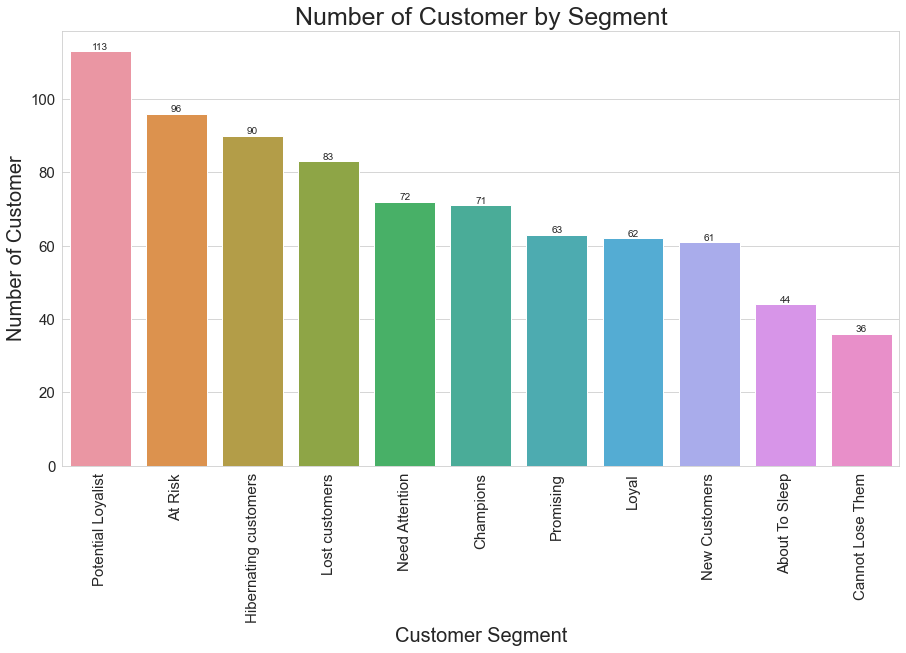

In [23]:
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
g = sns.barplot(x='segment', y='NoCustomer', data=summary_segment, order=summary_segment['segment'])
g.set_title('Number of Customer by Segment', fontsize=25)
g.set_xlabel('Customer Segment', fontdict={'size': 20})
g.set_ylabel('Number of Customer', fontdict={'size': 20})
g.bar_label(g.containers[0])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

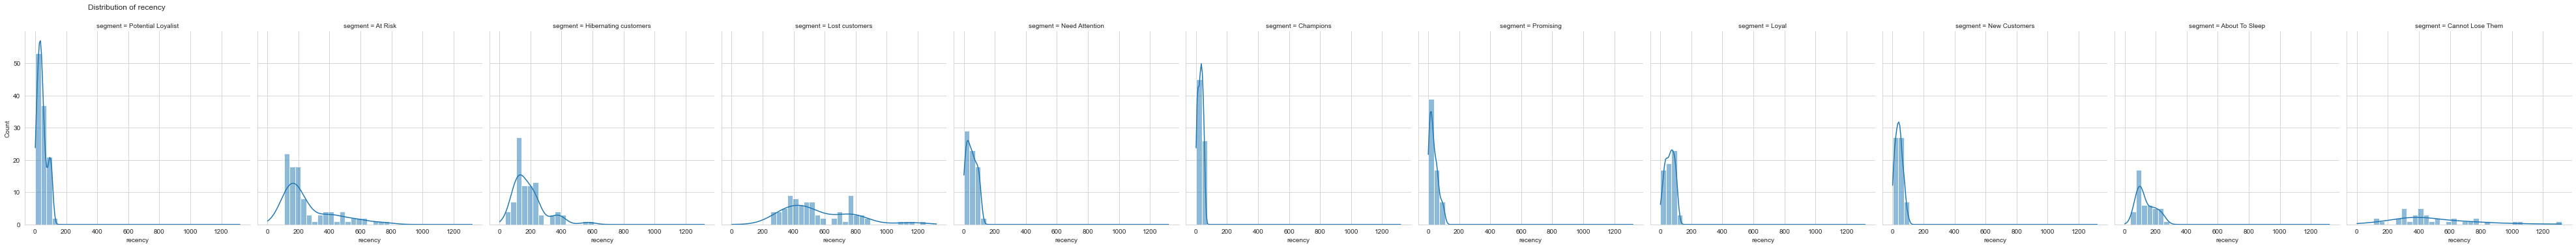

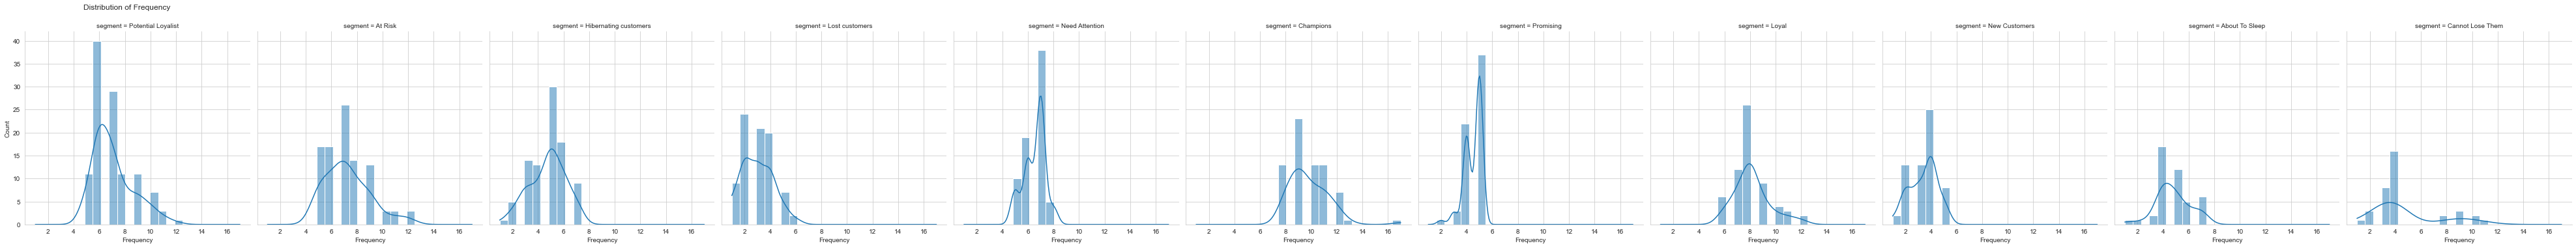

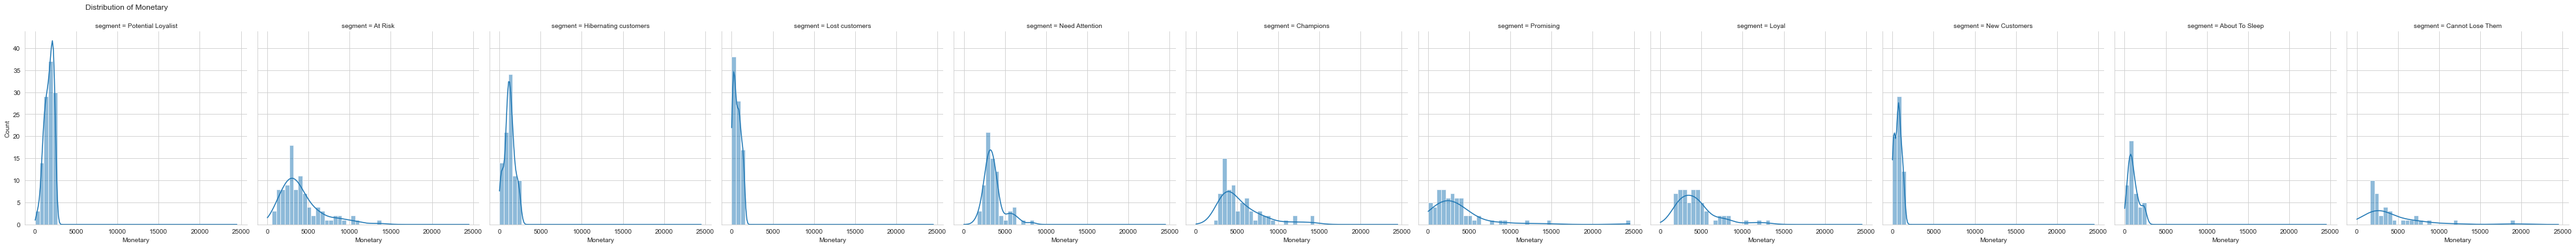

In [24]:
cols=['recency', 'Frequency', 'Monetary']
for j in cols:
        g = sns.displot(x=rfm_df[j], data=rfm_df, kde=True, col='segment', col_order=summary_segment['segment'])
        g.fig.suptitle(f"Distribution of {j}", y =1.05, x=0.05)
        plt.show()


# Đánh giá về phân khúc KH
- phân khúc KH chiếm số lượng nhiều nhất là 'Potential Loyalist' (113), những đối tượng có có thời gian mua sắm gần đây (<100 ngày), có tần suất mua hàng dao động từ 7-8 lần, với tổng số tiền chi tiêu từ 1000-2000 -> cần duy trì sự mua sắm tiềm năng của họ, cung cấp cho họ những ưu đãi, khuyến mãi cho việc mua sắm, đưa ra những chương trình thành viên/KH trung thành...

- 2 phân khúc KH có số lượng KH cao tiếp theo là 'At Risk' (96) và 'Hibernating' (90), 2 phân khúc này có đặc điểm chung là có lần mua hàng từ khá lâu (phần lớn là >100 ngày), với tần suất mua hàng ở mức khá, ở KH At Risk thì số tiền bỏ ra trên dưới 2500 -> cần đưa ra những ưu đãi để thu hút và kích thích họ quay trở lại mua sắm

- xếp sau là KH 'Lost Customer', những người có điểm R thấp, tức là lần cuối mua hàng từ rất lâu, tần suất và mức tiền chi tiêu cũng không cao, tuy có số lượng không nhỏ so với các tệp KH khác (83) nhưng không nên tập trung vào nhóm này

- tiếp theo là 'Need Attention' (72) và 'Champion' (71):
	- 'Need Attention': có mua sắm gần đây, tần suất (6-7) và mức chi tiêu khá tốt (phần lớn >1000).
	- 'Champions': mua sắm gần đây nhất, tần suất cũng cao (>8) cả mức chi tiêu cao >2500 -> cho họ dùng thử các sản phẩm mới, nếu thuận lợi có thể trở thành 1 kênh quảng bá tiềm năng thu hút các KH mới
	
- 3 tệp KH tiếp theo có số lượng gần ngang nhau:
	- 'Promising' (63): mua sắm gần đây, nhưng tần suất không cao, mức chi tiêu cũng phân bố dàn trải từ 0-5000
	- 'Loyal' (62): có mức chi tiêu và cả tần suất tốt
	- 'New Customers' (61): mới mua sắm gần đây nhưng ít lần mua, mức chi tiêu cũng tương đối thấp

- 2 tệp KH cuối cùng là 'About to Sleep' và 'Cannot Lose Them':
	- 'About to Sleep' (44): mức chi tiêu và tần suất không cao
	- 'Cannot Lose Them' (36): có tần suất mức chi tiêu của 1 số nằm ở mức tốt, nhưng phần lớn đã lâu chưa mua sắm (>300) -> cần thực hiện các hoạt động để kéo họ quay trở lại mua sắm

# Phân tích thêm về danh mục sản phẩm

## Số lượng sản phẩm

In [25]:
product_df = pd.read_excel('Dataset.xlsx', sheet_name='Product')
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Row ID        1894 non-null   int64 
 1   Product ID    1894 non-null   object
 2   Category      1894 non-null   object
 3   Sub-Category  1894 non-null   object
 4   Product Name  1894 non-null   object
dtypes: int64(1), object(4)
memory usage: 74.1+ KB


In [26]:
product_df['Product ID'].duplicated().any()

True

In [27]:
product_df = product_df.drop_duplicates(subset=['Product ID'])
product_df

,Row ID,Product ID,Category,Sub-Category,Product Name
0,1,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...
1889,1890,TEC-PH-10002817,Technology,Phones,RCA ViSYS 25425RE1 Corded phone
1890,1891,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal
1891,1892,OFF-AP-10003099,Office Supplies,Appliances,"Eureka Hand Vacuum, Bagless"
1892,1893,TEC-PH-10002645,Technology,Phones,LG G2


In [30]:
product_order_df = pd.merge(order_no_return[['Product ID', 'Sales', 'Quantity', 'Customer ID', 'Order ID', 'Order Date']], \
                            product_df, on='Product ID', how='left')
product_order_df

,Product ID,Sales,Quantity,Customer ID,Order ID,Order Date,Row ID,Category,Sub-Category,Product Name
0,OFF-AP-10002457,209.300,2,CC-12430,CA-2017-126221,2017-12-30,554,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...
1,FUR-BO-10003441,323.136,4,PO-18865,CA-2017-143259,2017-12-30,719,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass..."
2,TEC-PH-10004774,90.930,7,PO-18865,CA-2017-143259,2017-12-30,720,Technology,Phones,Gear Head AU3700S Headset
3,OFF-BI-10003684,52.776,3,PO-18865,CA-2017-143259,2017-12-30,721,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders
4,OFF-FA-10003472,3.024,3,JM-15580,CA-2017-156720,2017-12-30,244,Office Supplies,Fasteners,Bagged Rubber Bands
...,...,...,...,...,...,...,...,...,...,...
9189,OFF-AR-10003478,19.536,3,MB-18085,CA-2014-141817,2014-01-05,361,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...
9190,OFF-LA-10003223,11.784,3,PO-19195,CA-2014-112326,2014-01-04,613,Office Supplies,Labels,Avery 508
9191,OFF-ST-10002743,272.736,3,PO-19195,CA-2014-112326,2014-01-04,421,Office Supplies,Storage,SAFCO Boltless Steel Shelving
9192,OFF-BI-10004094,3.540,2,PO-19195,CA-2014-112326,2014-01-04,614,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs


In [47]:
category_quantity = product_order_df.groupby(['Category', 'Sub-Category'], as_index=False).agg({'Quantity':'sum'})
category_quantity.sort_values(['Category', 'Quantity'], ascending=False)

,Category,Sub-Category,Quantity
16,Technology,Phones,3026
13,Technology,Accessories,2755
15,Technology,Machines,379
14,Technology,Copiers,215
6,Office Supplies,Binders,5416
10,Office Supplies,Paper,4725
11,Office Supplies,Storage,2947
5,Office Supplies,Art,2834
4,Office Supplies,Appliances,1549
9,Office Supplies,Labels,1313


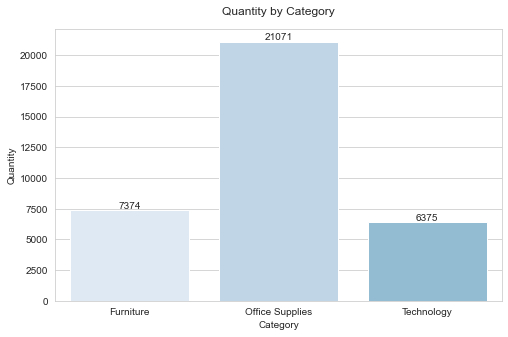

In [44]:
plt.figure(figsize = (8,5))
sns.set_palette("Blues")
c=sns.barplot(data=category_quantity, x='Category', y='Quantity', ci=None, estimator=sum)
c.set_title("Quantity by Category", y=1.03)
c.bar_label(c.containers[0])
plt.show()

<Figure size 1080x576 with 0 Axes>

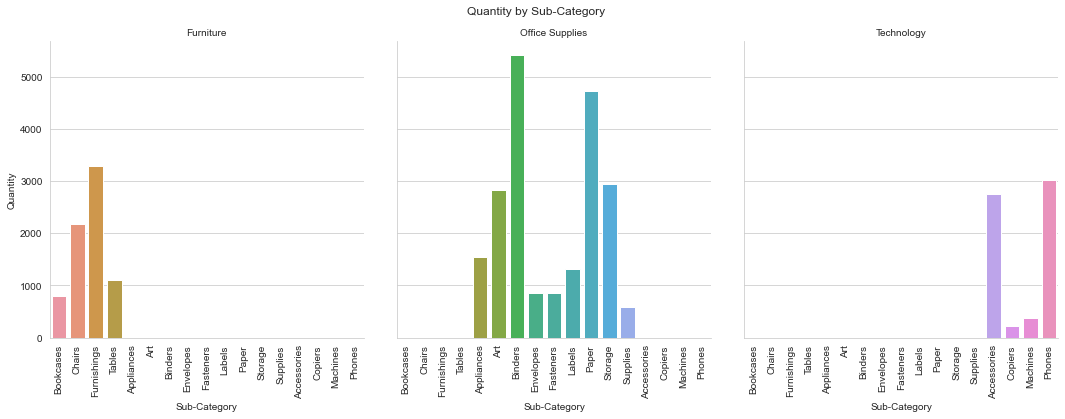

In [36]:
plt.figure(figsize = (15,8))
g=sns.catplot(data=category_quantity, x='Sub-Category', y='Quantity', kind='bar', col='Category', ci=None)
g.fig.suptitle("Quantity by Sub-Category", y=1.03)
g.set_titles('{col_name}')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=90)
# plt.xticks(rotation=90)
plt.show()

### Nhận xét về số lượng sản phẩm được mua
- 'Office Supplies' có số lượng được mua nhiều nhất (21071), trong danh mục này, Binders và Paper là 2 loại sản phẩm bán chạy nhất, vượt xa với các loại khác với lần lượt số lượng mua là 5416 và 4725, trong khi đó Supplies là ít được mua nhất (585), tiếp theo là Fastener (846) và Envelopes (856)
- 'Furniture' được mua nhiều thứ 2 (7374) nhưng chỉ bằng khoảng 1/3 so với 'Office Supplies'. 'Furnishings' có số lượng mua nhiều nhất (3286), ít nhất là 'Bookcases' (802)
- 'Technology' có số lượng ít nhất trong 3 danh mục sản phẩm, nhưng kém không nhiều so với 'Furniture' (6375 so với 7374). 'Phones' (3026) và 'Accessories' (2755) có số lượng mua hàng vượt trội so với 2 sản phẩm còn lại là 'Machines' (379) và 'Copiers' (215)

## Doanh thu từ các danh mục sản phẩm

In [48]:
sale_by_category = product_order_df.groupby('Category', as_index=False).agg(Revenue=('Sales','sum'))
sale_by_category = sale_by_category.sort_values('Revenue', ascending=False)
sale_by_category

,Category,Revenue
2,Technology,763445.8590
0,Furniture,682780.6204
1,Office Supplies,670470.1030


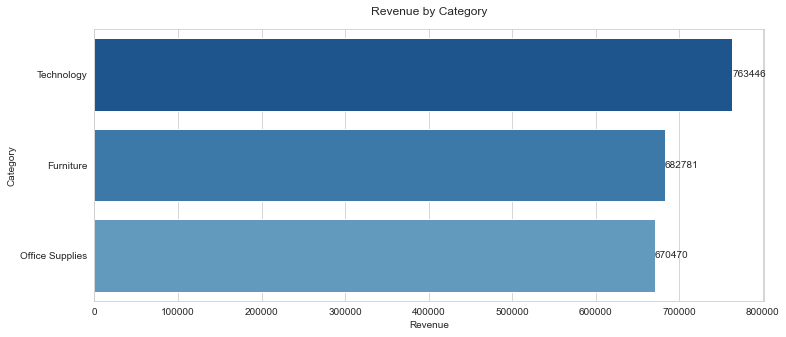

In [42]:
plt.figure(figsize = (12,5))
sns.set_palette("Blues_r")
g=sns.barplot(data=sale_by_category, y='Category', x='Revenue', \
              order=sale_by_category['Category'], ci=None)
g.set_title("Revenue by Category", y=1.03)
g.bar_label(g.containers[0])
plt.show()

In [50]:
sale_by_subcate = product_order_df.groupby(['Category', 'Sub-Category'], as_index=False).agg(Revenue=('Sales','sum'))
sale_by_subcate = sale_by_subcate.sort_values(['Category', 'Revenue'], ascending=False)
sale_by_subcate

,Category,Sub-Category,Revenue
16,Technology,Phones,302373.4400
15,Technology,Machines,176080.2410
13,Technology,Accessories,154663.9880
14,Technology,Copiers,130328.1900
11,Office Supplies,Storage,209163.6800
6,Office Supplies,Binders,193429.5840
4,Office Supplies,Appliances,97402.3790
10,Office Supplies,Paper,71338.9240
12,Office Supplies,Supplies,43477.5760
5,Office Supplies,Art,25689.6680


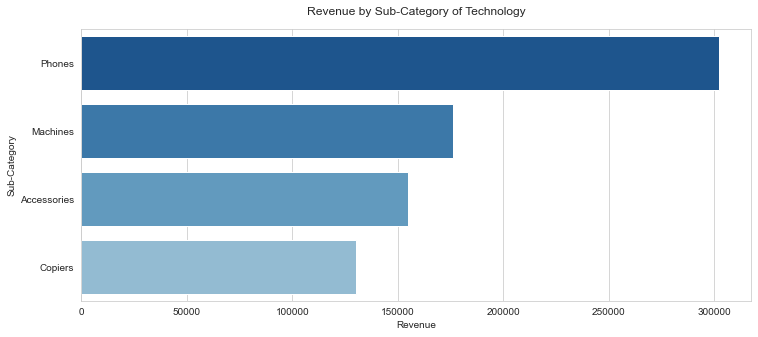

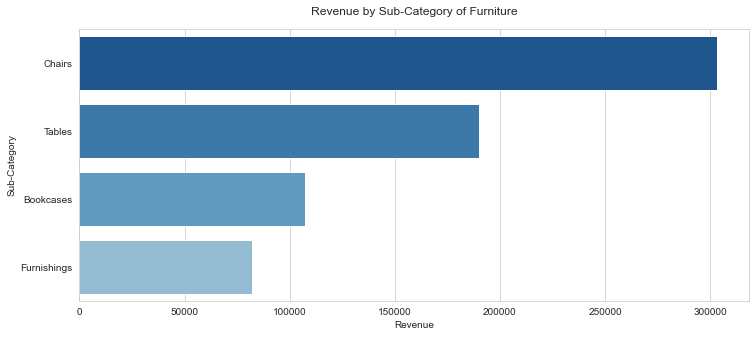

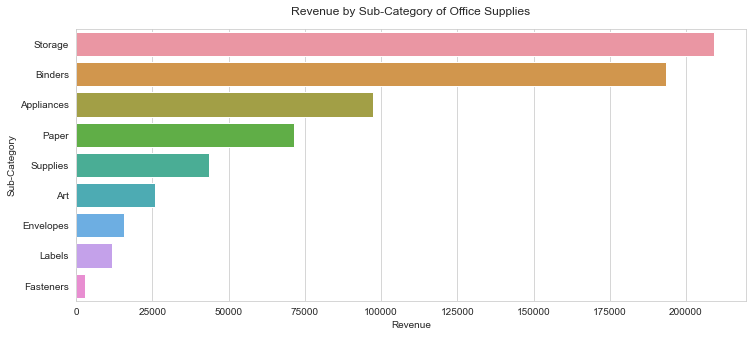

In [43]:

category=['Technology', 'Furniture', 'Office Supplies']
for i in category:
    plt.figure(figsize = (12,5))
    sns.set_palette("Blues_r")
    sc = sns.barplot(data=sale_by_subcate[sale_by_subcate['Category'] == i], y='Sub-Category', x='Revenue')
    sc.set_title(f"Revenue by Sub-Category of {i}", y=1.03)
    sc.bar_label(g.containers[0])
    plt.show()

### Nhận xét về doanh thu từ các danh mục sản phẩm
- Tuy có số lượng bán ra ít nhất nhưng Technology là danh mục có doanh thu cao nhất (763445.8590) so với các danh mục khác. Trong 'Technology', 'Phones' có doanh thu cao nhất (302373.4400) gần gấp đôi so với sản phẩm xếp sau là 'Machines' (176080.2410)
- Trong Furniture (tổng doanh thu xếp thứ 2: 682780.6204). 'Chair' có doanh thu cao nhất (763445.8590)
- Office Supplies có doanh thu 670470.1030. Storage (209163.6800) và Binders (193429.5840) có doanh thu cao vượt trội hơn so với loại sản phẩm xếp thứ 3 là Appliances (97402.3790)